# Machine Learning Algorithms

### 1. Supervised Learning
### 2. Unsupervised Learning

### 3. Regression
##### Correlation tells how one variable is dependent on another variable.  In other words, if X moves up then does Y go up or down. 
##### Usually Y is the target variable and X1, X2, X3 are the points of interests 
##### Regression will tell how much impact will certain variables will have on the target variable, what variables can be ignored. 
##### Residual - Difference between actual and predicted values. 
##### Goodness of fit  - refers to measuring how well do the observed data correspond to the fitted (assumed) model.

######  y = B0 + B1x1 + B2x2 + E
###### (Beta0, Beta1, Beta2 are coefficient or independent variables or in other words, what weightage is given in the equation.  E is the error.)

In [1]:
import pandas as pd
import numpy as np

In [2]:
df = pd.read_csv('Advertising.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   radio       200 non-null    float64
 3   newspaper   200 non-null    float64
 4   sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [4]:
df.shape

(200, 5)

In [5]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [6]:
df.corr()

,Unnamed: 0,TV,radio,newspaper,sales
Unnamed: 0,1.000000,0.017715,-0.110680,-0.154944,-0.051616
TV,0.017715,1.000000,0.054809,0.056648,0.782224
radio,-0.110680,0.054809,1.000000,0.354104,0.576223
newspaper,-0.154944,0.056648,0.354104,1.000000,0.228299
sales,-0.051616,0.782224,0.576223,0.228299,1.000000


In [7]:
import matplotlib as plt
import seaborn as sns

<AxesSubplot:xlabel='TV', ylabel='Count'>

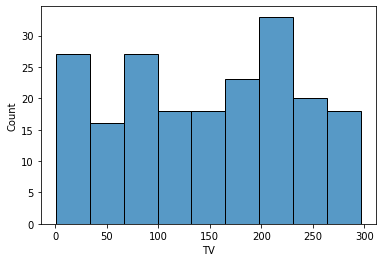

In [8]:
sns.histplot(df['TV'])

In [9]:
df.drop('Unnamed: 0', axis=1)

,TV,radio,newspaper,sales
0,230.1,37.8,69.2,22.1
1,44.5,39.3,45.1,10.4
2,17.2,45.9,69.3,9.3
3,151.5,41.3,58.5,18.5
4,180.8,10.8,58.4,12.9
...,...,...,...,...
195,38.2,3.7,13.8,7.6
196,94.2,4.9,8.1,9.7
197,177.0,9.3,6.4,12.8
198,283.6,42.0,66.2,25.5


In [10]:
import matplotlib.pyplot as plt
### plt.figure(figsize=(15,8))
###cols=['TV','radio', 'newspaper', 'sales']
### sns.pairplot(df, vars=cols, kind='kde', hue='sales')

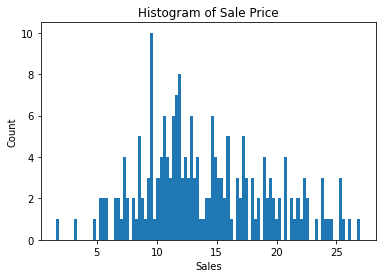

In [11]:
plt.hist(df['sales'], bins=100)
plt.xlabel('Sales')
plt.ylabel('Count')
plt.title('Histogram of Sale Price')
plt.show()

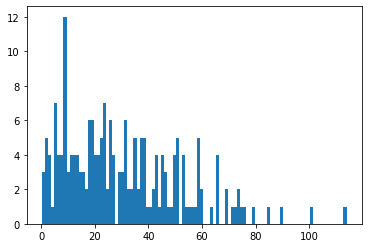

In [12]:
plt.hist(df['newspaper'], bins=100)
plt.show()

<AxesSubplot:xlabel='TV', ylabel='Count'>

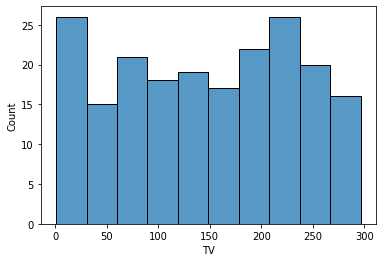

In [13]:
sns.histplot(df['TV'], bins=10)

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='radio', ylabel='Density'>

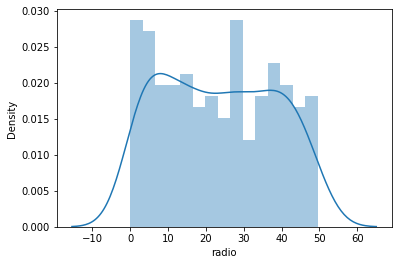

In [14]:
sns.distplot(df['radio'], bins=15)

In [15]:
### If the variable is skewed, you can go for log or cuberoot or squareroot transformation
df['newspaper'] = np.log1p(df['newspaper'])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

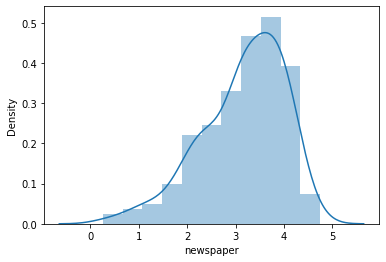

In [16]:
sns.distplot(df['newspaper'])

/usr/local/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='newspaper', ylabel='Density'>

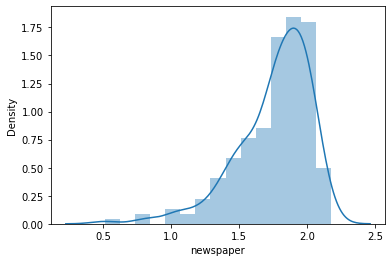

In [17]:
df['newspaper']=np.sqrt(df['newspaper'])
sns.distplot(df['newspaper'])

In [18]:
from sklearn.preprocessing import MinMaxScaler

In [19]:
mn = MinMaxScaler()
mn_df = mn.fit_transform(df[['TV', 'radio', 'newspaper']]) 
# fit_transform: fit tells machine to learn the data, fit means learn; 
#  whereas transform means transforming the data 

In [20]:
# Converting the array mn_df into a new dataframe called df1
# mn_df is the dataframe as the first variable. Columns is for specifying columns, and index is being used as same as of dataframe
df1 = pd.DataFrame(mn_df, columns=['TV', 'radio', 'newspaper'], index=df.index)

In [21]:
df1.head()

,TV,radio,newspaper
0,0.775786,0.762097,0.930131
1,0.148123,0.792339,0.867328
2,0.055800,0.925403,0.930338
3,0.509976,0.832661,0.905822
4,0.609063,0.217742,0.905573


In [22]:
df1.describe()
# Here we notice that all the max values are same because the data has been transformed. 

,TV,radio,newspaper
count,200.000000,200.000000,200.000000
mean,0.494902,0.469032,0.745648
std,0.290342,0.299331,0.164605
min,0.000000,0.000000,0.000000
25%,0.249155,0.201109,0.664281
50%,0.504058,0.461694,0.780675
75%,0.737656,0.736391,0.867328
max,1.000000,1.000000,1.000000


#### Training Data, Test Data, and Unseen Data

In [23]:
#Assume there are 10 records in the data to build a predictive model.  
# If I split into 80:20 of data, so (80%) 8 records will go for training and (20%) 2 will go for testing
# So, you test the data based on the training you gave to machine 
# based on the training data to create a model

In [24]:
from sklearn.model_selection import train_test_split

In [25]:
X = df1
y = df['sales']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=1000)

In [27]:
# Import LinearRegression from sitekitlearn's Linear_model 
from sklearn.linear_model import LinearRegression

In [28]:
# Initialize the object to a variable to 'lr'
# Then pass X_train, y_train variables to fit model to learn 
lr = LinearRegression()
lr.fit(X_train, y_train)

LinearRegression()

In [29]:
# After learning, use the prediction variable pred with the test data X_test
# Here you are passing only X_test
pred = lr.predict(X_test)

In [30]:
pred

array([15.60505912, 17.8122821 , 17.33023069, 13.51386061,  9.71303136,
       12.46057884, 12.83891926, 14.36986185, 17.30556547,  8.55269725,
       14.38917029,  6.28908439, 16.76012821, 13.49479173,  7.95263466,
        9.81156802,  5.04524926, 16.31427994,  6.76556   , 18.56592311,
        5.85247985, 15.63782962, 12.64502136, 20.9613464 ,  8.76570167,
       18.49770912,  3.23615523,  7.35993199, 10.46800608, 15.42367948,
        6.28473282,  8.16015188,  6.83543077, 24.32866137,  9.74923274,
       20.54177335, 19.45472284, 11.30378792, 18.81233857, 14.19799219])

In [31]:
#y_test

In [32]:
## Regression Error 
### Mean Absolute Error
### Mean Squared Error
### Root Mean Seuqared Error
### R^2 and Adjusted R^2

In [33]:
# Mean Absolute Error (MAE) = ABS(y - y^) where y is actual value and y^ is predicted value
# Mean Squared Error (MSE) = (y-y^)^2 where y is actual value and y^ is predicted value
# Root Mean Squared Error = SQRT((y-y^)^2)
# R^2 If the value is close to 80% (0.8) or above then the prediction is supposed to be good

In [34]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [35]:
r_score = r2_score(y_test, pred)
r_score

0.9067798106602623

In [36]:
n= 200
p= 4

In [37]:
adj_r2=1-(1-r_score)*(n-1)/(n-p-1)
adj_r2

0.904867601648165

In [38]:
lr.coef_

array([13.84679758,  9.62759479,  0.06685861])

In [39]:
X.columns

Index(['TV', 'radio', 'newspaper'], dtype='object')

In [40]:
lr.intercept_

2.525723511913137

In [41]:
# y=2.5 + 13.8*TV + 9.6*radio + 0.11*newspaper

In [42]:
# Overfitting: There are situation where the model is giving great results 
# while testing and training the data but when new data (unforeseen data) is 
# given to the model, the model does not work well. This is overfitting. 

# Out of Train: Say you have 1,000 records but then you split data 80:20 
# with only 900 records.  Once you build the model by training and testing 
# on data within the 900 records.  Then you provide 100 records to the model 
# to assess how well the model works with the new set of data. 

# For example, if you have data from year 2017 to 2020 then you normally 
# keep some data out of training from each year (say Jan to Apr).  Once you
# train the model, you then pass the unseen data (Jan to Apr) to see its 
# performance to confirm how the model is giving the result. 

# In real life, you have been trained on questions from the book but when you
# go to exam and question appears which is little different and you cannot 
# answer the question. This is overfitting. 

# Underfitting is the situation where your model is not even able to perform 
# with the training data.  In other words, you are not even able to train the 
# model. 

# Therefore, any model should generalize well because both underfitting and 
# overfitting are not desirable. 
# 

In [43]:
df1.shape

(200, 3)

In [44]:
# The below statements show whether we can train the data or not. 
# If the value is 0.5 or lower then it is underfitting.
# If the value is 2.5 or above (greater than 3) then it is overfitting.
n= 200
p= 4
r_train = r2_score(y_train, lr.predict(X_train))
adj_r2 = 1-(1-r_train)*(n-1)/(n-p-1)
adj_r2

0.8913951584085699

In [45]:
# If you have overfitting issue then what you should do? 
# You use Regularization Techniques to handle overfitting issue. 
# Regularization Techniques: 
#   (1) Lasso: Least Absolute Shrinkage and Selection Operator
#   (2) Ridge: 
# Machine Learning is trial and error. 
# Feature Selection: Check the coefficient and based on weightage you can 
# determine which variable is important or not important. Then the variable 
# that is not important, you will drop that variable and then check how 
# the model performs. 

# Lasso tells directly which variable is not important. 
# For example, 20 variables, the linear regression is giving 0.68. Then I drop
# 2 variables and then run the linear regression which is giving 0.67. 
# Lasso: 
#   Bias: Something is related to training data; 
#         how much diffrence between actual vs. predicted values 
#   Variance: Something is related to test data 
#             
#  Overfitting: zero or less Bias but high variance

# When the model is too perfect the vriance is high 
# But when the variance is coming down along with bias is coming down. 

# Seasaw situation where bias goes up and variance goes down.  
# You need to find tradeoffs instead of trying to have perfect bias 
# with high variance. 

# LS = Error + Lambda|w|
# W = Beta1 + Beta2 + Beta3 + ....
# SSE = Sum of Squared Error 
# Ridge = SSE + Lambda|w|


In [46]:
# Lasso or Ridge will try to penalize you if you are too perfect. 
# You pass the Lambda as input parameter to penalize the too perfect model
# This way the slope (coefficient of variable) will be tilted (weightage). 
# 
# If you want to drop irrelevant variables then go for Lasso 
# If you want to consider all the variables then go for ridge

In [47]:
# Import Lasso and Ridge from linear model
from sklearn.linear_model import Lasso, Ridge
ls = Lasso()
ls.fit(X_train, y_train)
pred = ls.predict(X_test)
r_score = r2_score(y_test, pred)

In [48]:
1-(1-r_score)*(n-1)/(n-p-1)

0.15616294034492784

In [49]:
ls.coef_

array([2.38873976, 0.        , 0.        ])

In [50]:
ls = Lasso(alpha=0.08)
ls.fit(X_train, y_train)

Lasso(alpha=0.08)

In [51]:
pred=ls.predict(X_test)
r_score= r2_score(y_test, pred)
1-(1-r_score)*(n-1)/(n-p-1)

0.921999604332777

In [52]:
# In this case, the coefficient is telling that TV and radio are
# important variables for the model and Lasso tells you directly 
# that newspaper is not important. 
ls.coef_

array([12.9348789 ,  8.75566117,  0.        ])

#### Gradient Descent

In [53]:
# Internally we are trying to understand how the variance is optimized
# Error or Cost Function - Both terms are used interchangeably. 
# In order to minimize the cost function, I need to optimize the variance. 
# 

In [54]:
#### Simple Linear Equation
#### You are tryng to predict y based on only one variable

#### Multi Linear Equation 
#### You are trying to predict y based on x1, x2, x3....